In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
from scipy.stats import skew
from scipy.stats import boxcox

import warnings
warnings.filterwarnings('ignore')

In [2]:
wine = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Loading the dataset and converting the same to a DataFrame. 

1. We can check that we have 11 input variables and 1(Quality of wine) as putput. 
2. The dataset consists of 1599 Rows and 12 Columns. 
3. We can see that our goal is to identify the quality of the wine on the basis of the given input variables. 

So, first we will start with Data Preprocessing. 
1. We will check if we have any missing data in our dataset. 

In [3]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Perfect, we don't have any missing data in our wine dataset. We are good to proceed further. 

In [4]:
print('Information of your dataset:- \n')
print(wine.info())

Information of your dataset:- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


The above information giving us a breif details about the dataset. We can see all the values are non null and in same datatye. 

In [5]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [6]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [7]:
wine.shape

(1599, 12)

In [8]:
print("The following details shows the data types of your dataset :-")
print(wine.dtypes)

The following details shows the data types of your dataset :-
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


So, from above 2 statements we can check that our dataset only consists of float and int datatypes that is numbers which are required for machine learning. So, we don't have to use any encoding technique to convert the data

<function matplotlib.pyplot.show(close=None, block=None)>

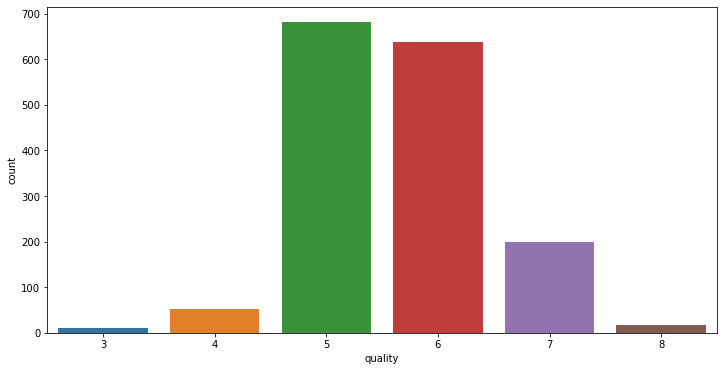

In [9]:
plt.figure(figsize = (12,6))
sns.countplot(wine['quality'])
plt.show

The label of our dataset aren't equally as we can see that we have following values for following outputs:

1. Quality 5 = 681
2. Quality 6 = 638
3. Quality 7 = 199
4. Quality 4 = 53
5. Quality 8 = 18
6. Quality 3 = 10

In [10]:
col = wine.columns

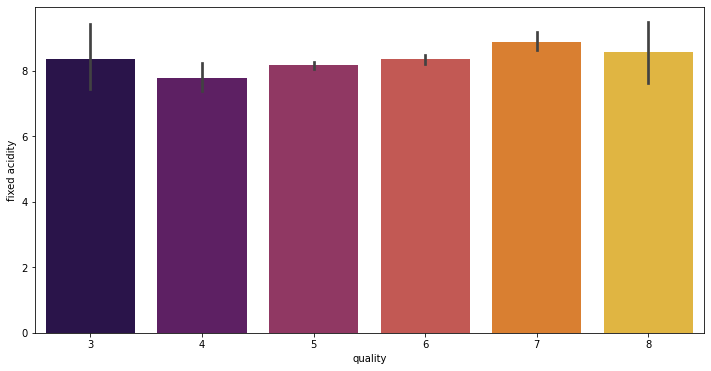

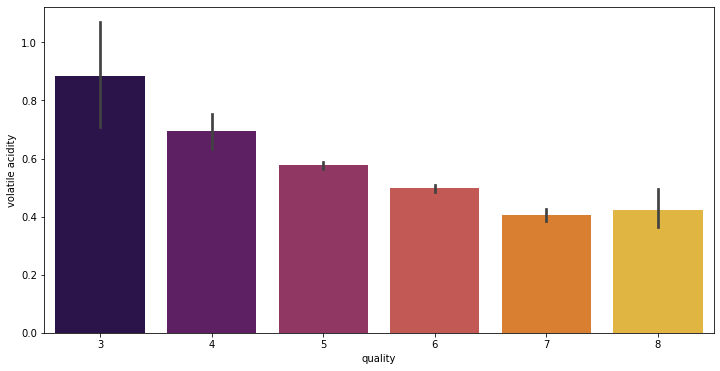

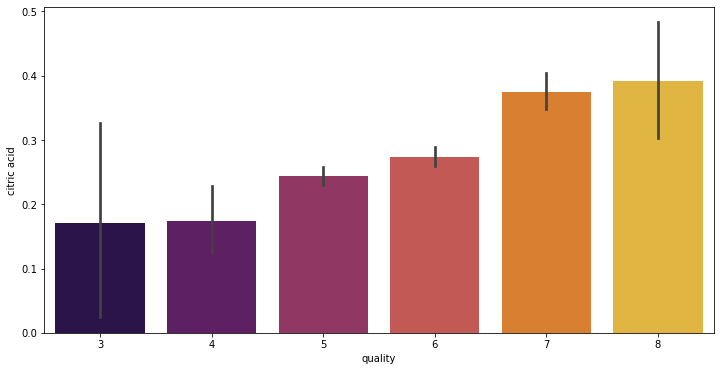

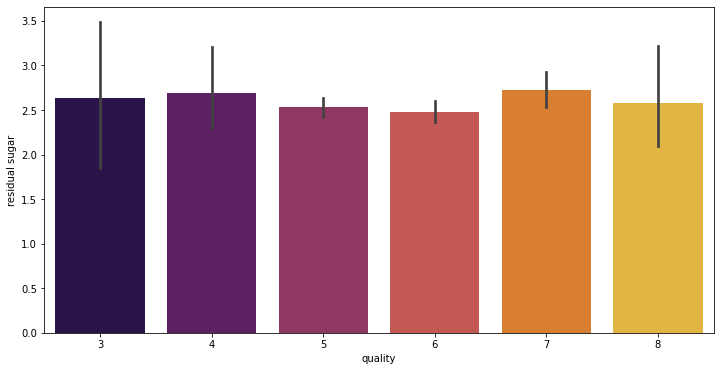

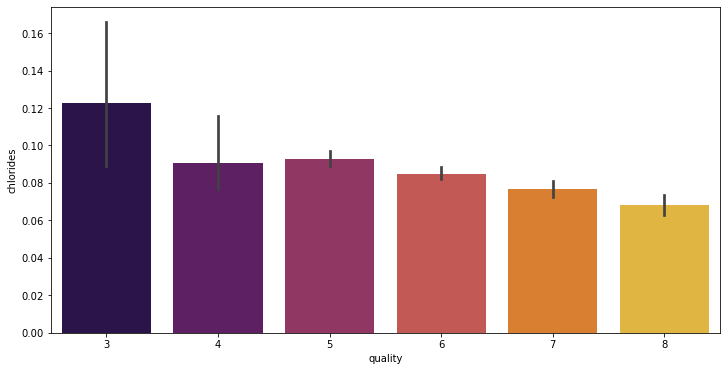

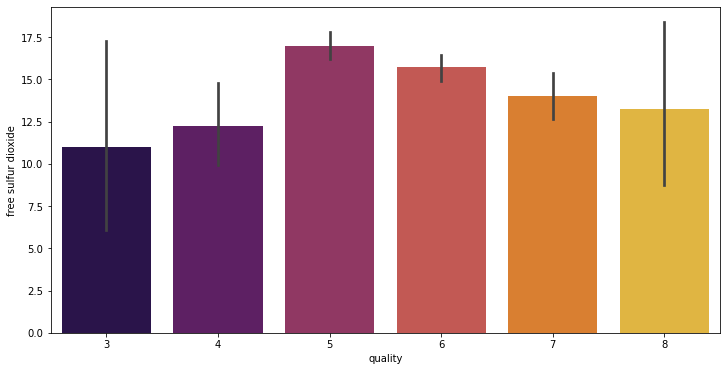

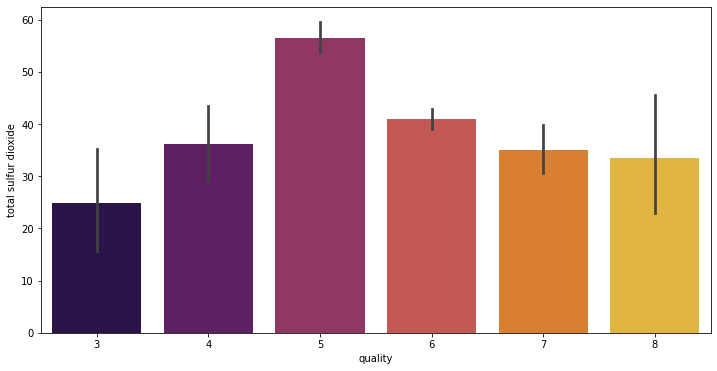

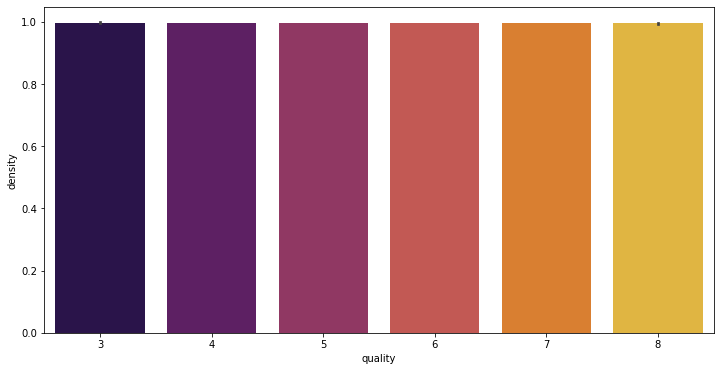

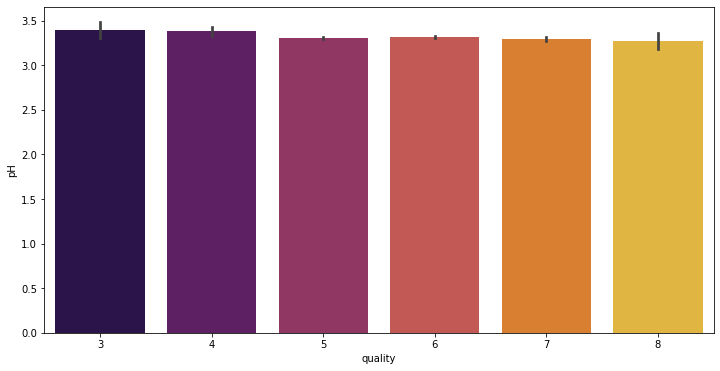

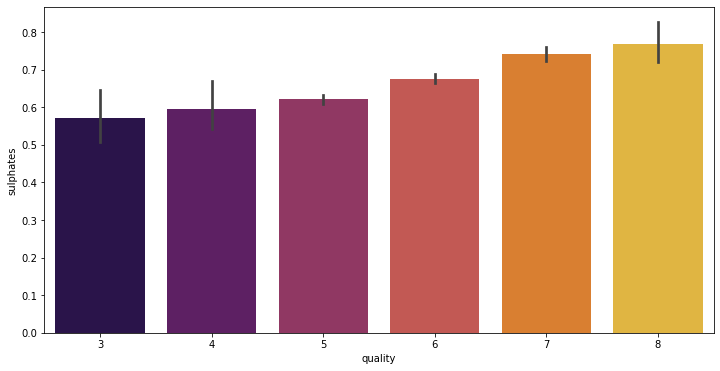

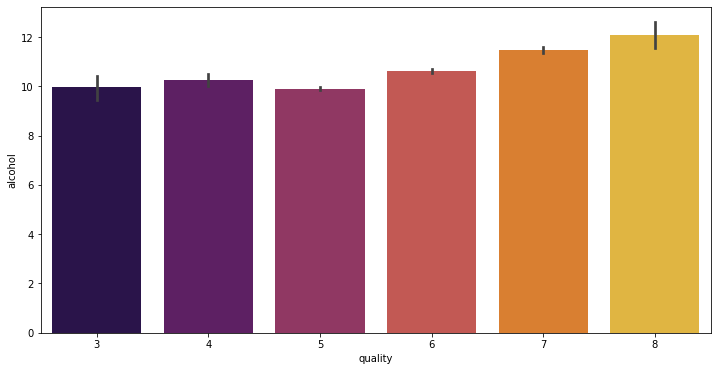

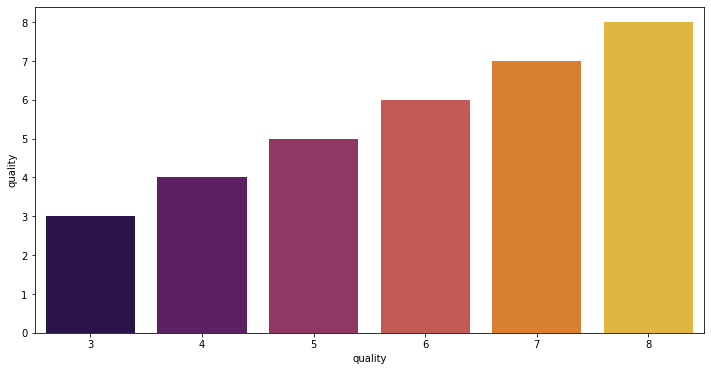

In [11]:
for i in col:
    plt.figure(figsize = (12,6))
    sns.barplot(x = 'quality' , y = i , data = wine, palette = "inferno")
    plt.show()

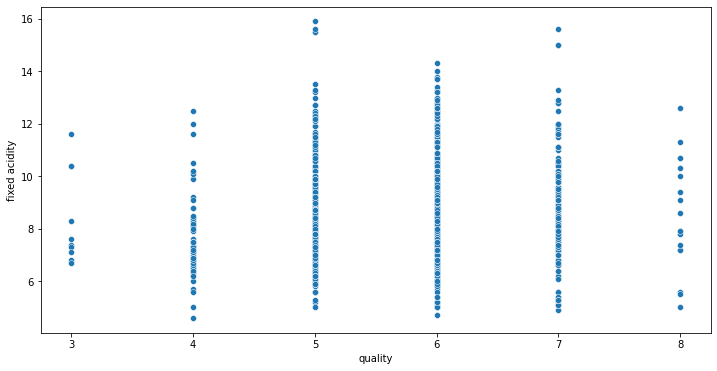

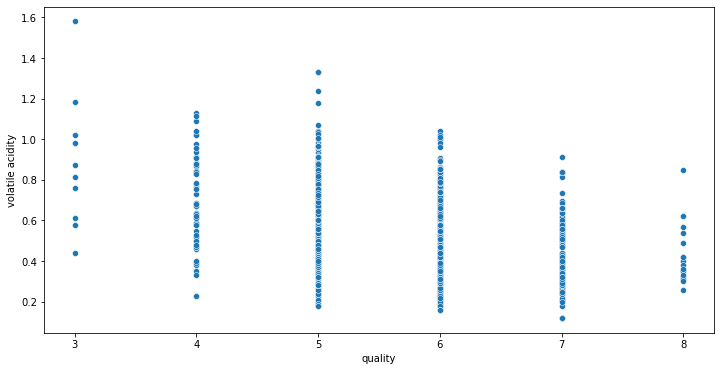

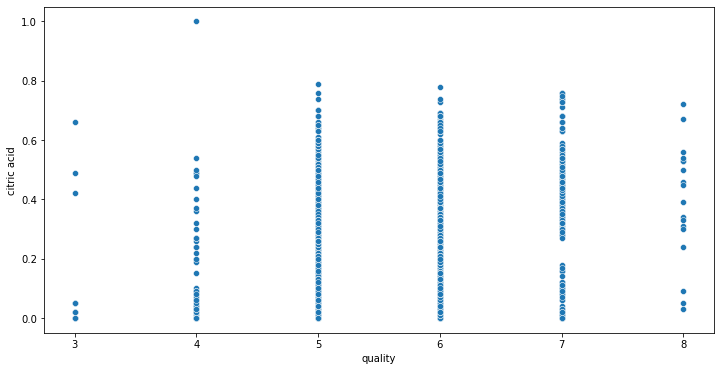

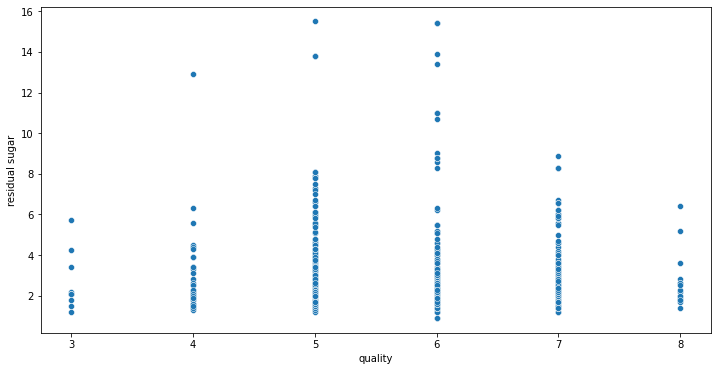

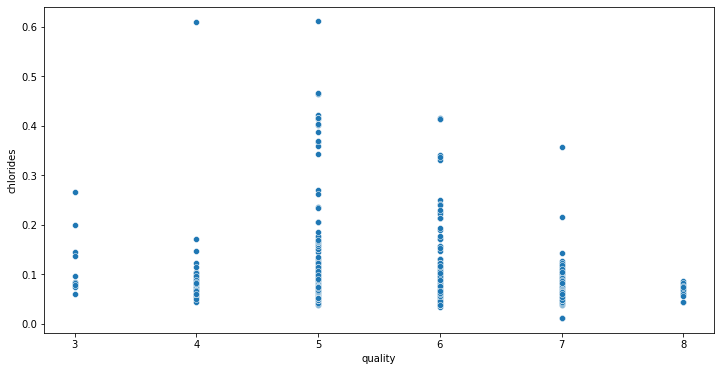

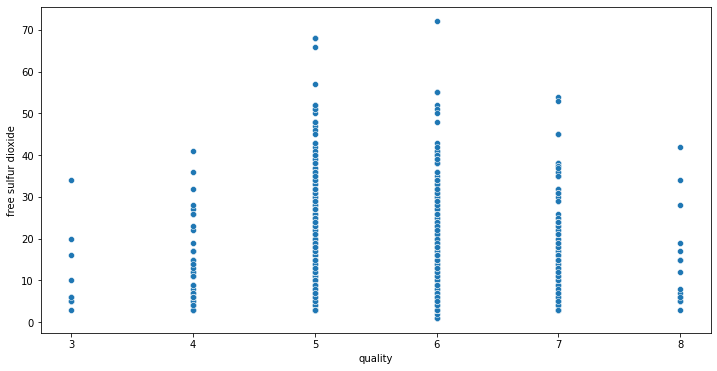

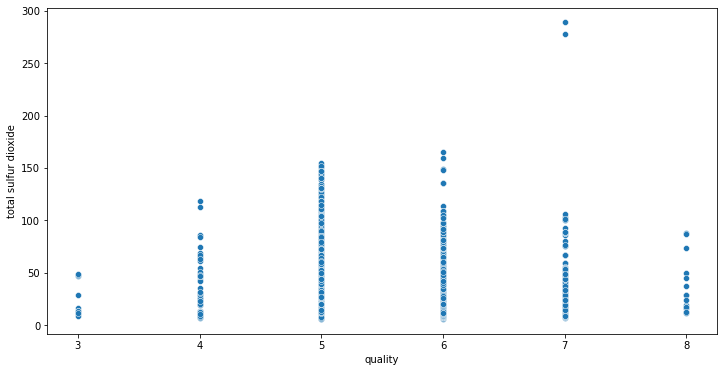

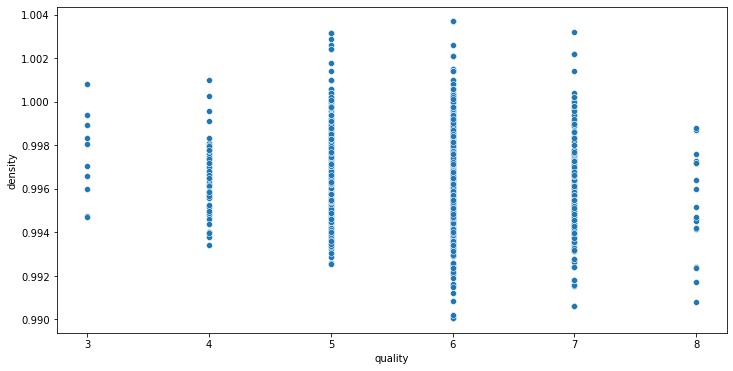

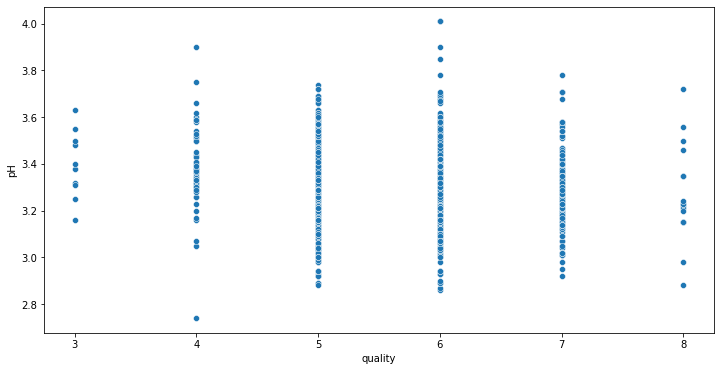

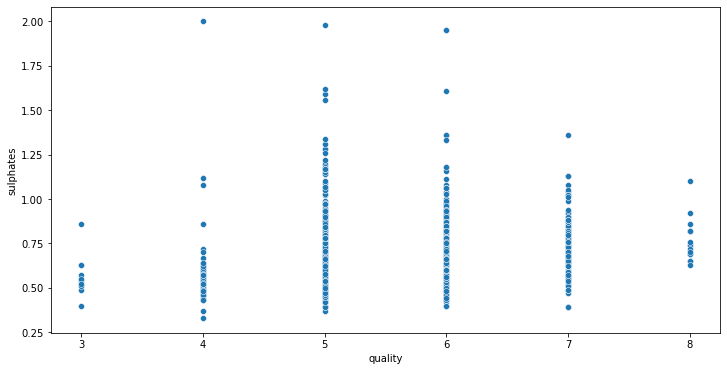

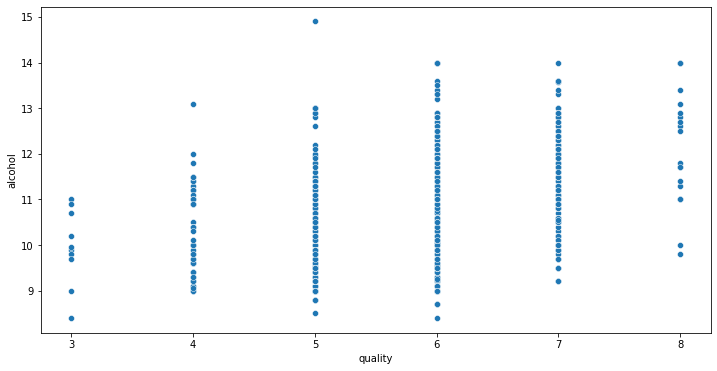

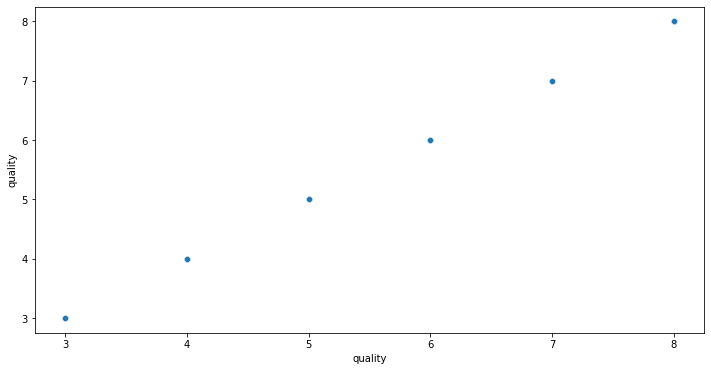

In [12]:
for i in col:
    plt.figure(figsize = (12,6))
    sns.scatterplot(x = 'quality' , y = i , data = wine)
    plt.show()

In [13]:
#plt.figure(figsize = (12,6))
#sns.pairplot(wine)
#plt.show()

Above is the graphical representation of the columns with their values and we can see that there are various outliers in several columns. 

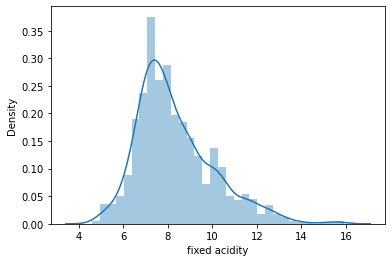

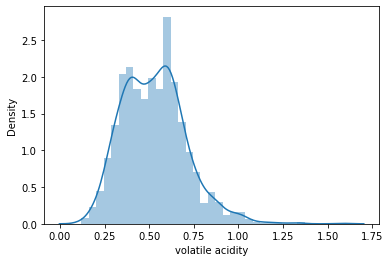

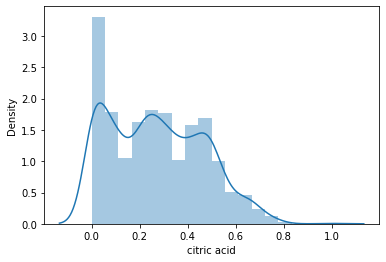

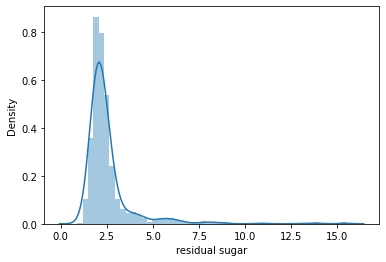

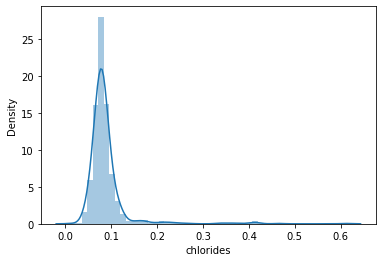

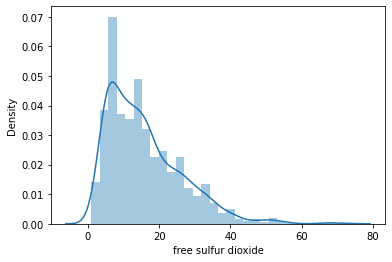

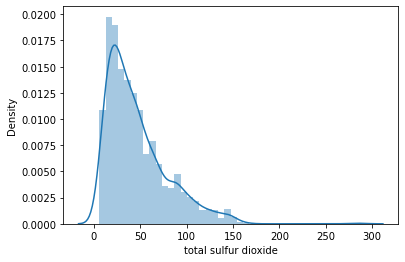

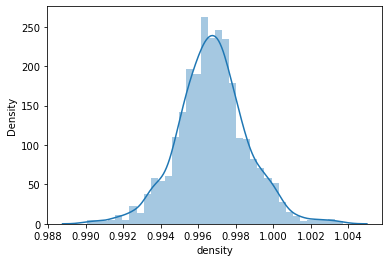

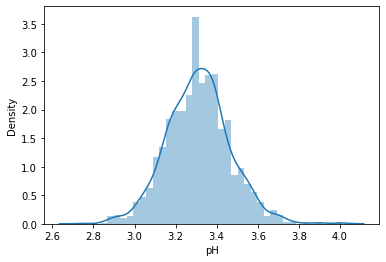

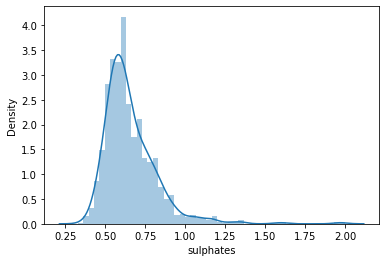

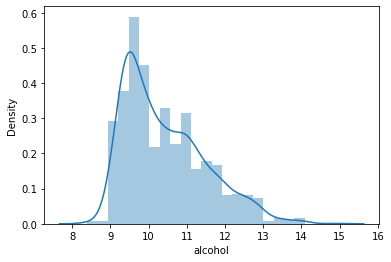

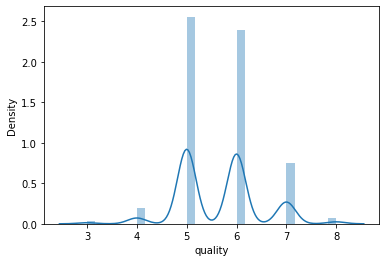

In [14]:
for i in wine:
    plt.figure()
    sns.distplot(wine[i])
    plt.show

The above the graphical representation of the data, showing the type of distribution our data set is having:-

1. we can check few columns like free sulphur, total sulphur, alcohol etc have skewness. 

In [15]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


The above details shows the correlation between between several columns in our dataset. 

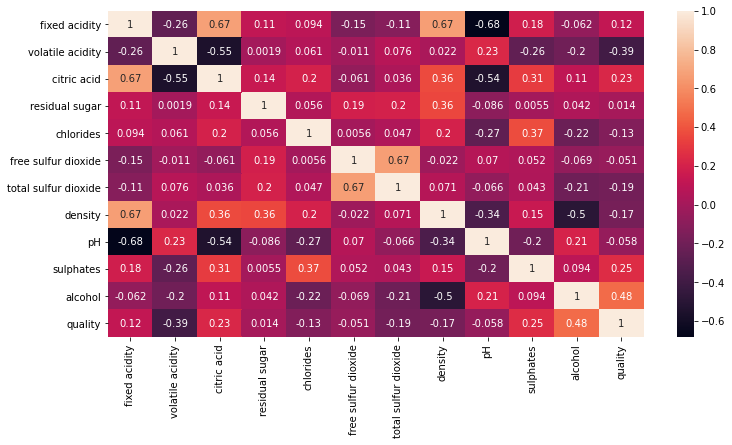

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(wine.corr(), annot = True)
plt.show()

The above heatmap shows that:-
    
    1. The above heatmap shows that alcohol is highy corelated with the quality. Sulphate 2nd most highly corelated, 3rd most is citric acid, fixed acidity,  
    2 Volatile acidity is highly negativaly corelated with the quality. As volaltile acidity is highy negativaly corelated it won't effect the values of quality. Hence awe can drop this column from our database. 

In [17]:
wine_new = wine.drop('volatile acidity', axis = 1)

In [18]:
print(wine.shape)
print('----------')
print(wine_new.shape)

(1599, 12)
----------
(1599, 11)


So, from the boxplot above we checked that we have outliers in dataset, which would affect the quality of our model. So, we will proceed to handle the outliers first. Firstly we will check columns with high skeneww using skew function

In [19]:
wine_new.skew()

fixed acidity           0.982751
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

From the above details we can see that:

1. fixed acidity           0.982751
2. residual sugar          4.540655   Highly Skewed
3. chlorides               5.680347   Highly Skewed
4. free sulfur dioxide     1.250567
5. total sulfur dioxide    1.515531
6. sulphates               2.428672
7. alcohol                 0.860829

As for us skeweness is accepted between -0.5 to 0.5, the above columns are highly skewed. so, let's try removing skewness from these columns using several methods we have:

1. Log Transform
2. Square Root Transform
3. Box-Cox Transform

The skewness for fixed acidity is: -  0.9827514413284587
The skewness for fixed acidity in graph is: - 


<function matplotlib.pyplot.show(close=None, block=None)>

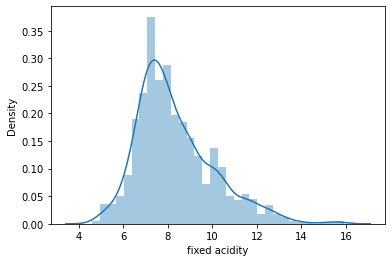

In [20]:
print("The skewness for fixed acidity is: - ",wine_new['fixed acidity'].skew())
print("The skewness for fixed acidity in graph is: - ")
plt.figure()
sns.distplot(wine_new['fixed acidity'])
plt.show

0.3939149942929756
New graph :-


<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

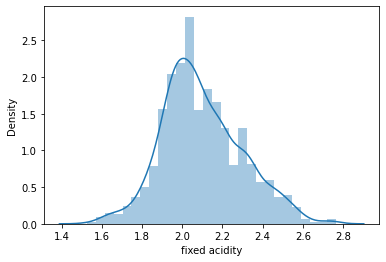

In [21]:
wine_new['fixed acidity'] = np.log(wine_new['fixed acidity'])
    
print(wine_new['fixed acidity'].skew())
print("New graph :-")
sns.distplot(wine_new['fixed acidity'])

No we can see that skewness is reduced and same can be seen in graph as well. 

Graph before removing skewness AxesSubplot(0.125,0.125;0.775x0.755)


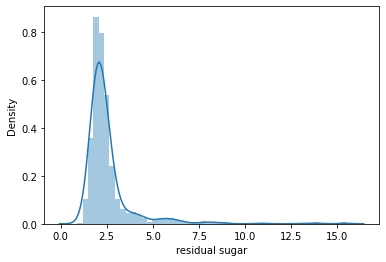

In [22]:
#residual sugar 4.540655 Highly Skewed
print("Graph before removing skewness", sns.distplot(wine_new['residual sugar']))

1.8068638195807207
New graph :-


<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

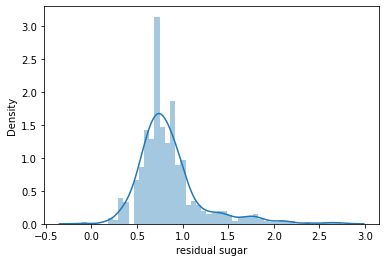

In [23]:
wine_new['residual sugar'] = np.log(wine_new['residual sugar'])
    
print(wine_new['residual sugar'].skew())
print("New graph :-")
sns.distplot(wine_new['residual sugar'])

Graph before removing skewness AxesSubplot(0.125,0.125;0.775x0.755)


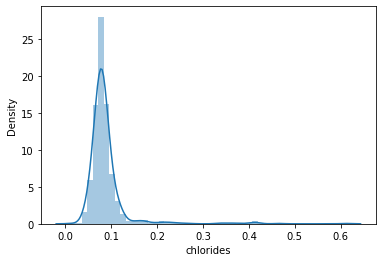

In [24]:
#chlorides 5.680347 Highly Skewed
print("Graph before removing skewness", sns.distplot(wine_new['chlorides']))

-0.49964324850462416
New graph :-


<AxesSubplot:xlabel='chlorides', ylabel='Density'>

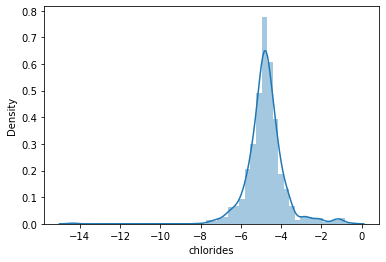

In [25]:
wine_new['chlorides'] = stats.boxcox(wine_new['chlorides'])[0]
    
print(wine_new['chlorides'].skew())
print("New graph :-")
sns.distplot(wine_new['chlorides'])

Graph before removing skewness AxesSubplot(0.125,0.125;0.775x0.755)


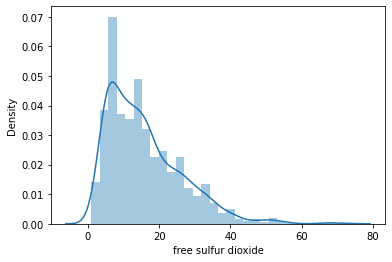

In [26]:
#free sulfur dioxide 1.250567
print("Graph before removing skewness", sns.distplot(wine_new['free sulfur dioxide']))

-0.019777750883785125
New graph :-


<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

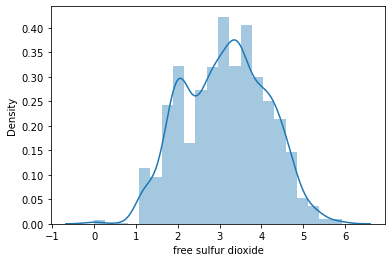

In [27]:
wine_new['free sulfur dioxide'] = stats.boxcox(wine_new['free sulfur dioxide'])[0]
    
print(wine_new['free sulfur dioxide'].skew())
print("New graph :-")
sns.distplot(wine_new['free sulfur dioxide'])

Graph before removing skewness AxesSubplot(0.125,0.125;0.775x0.755)
value after removing the skewness -0.008028145489947599
New graph :-


<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

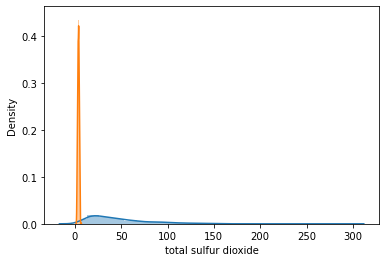

In [28]:
#total sulfur dioxide 1.515531
print("Graph before removing skewness", sns.distplot(wine_new['total sulfur dioxide']))

wine_new['total sulfur dioxide'] = stats.boxcox(wine_new['total sulfur dioxide'])[0]
    
print("value after removing the skewness", wine_new['total sulfur dioxide'].skew())
print("New graph :-")
sns.distplot(wine_new['total sulfur dioxide'])

Graph before removing skewness AxesSubplot(0.125,0.125;0.775x0.755)
value after removing the skewness -0.024779310382209464
New graph after removing the skewness:-


<AxesSubplot:xlabel='sulphates', ylabel='Density'>

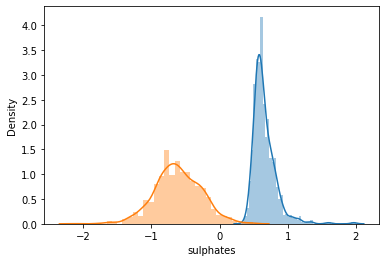

In [29]:
#sulphates 2.428672
print("Graph before removing skewness", sns.distplot(wine_new['sulphates']))

wine_new['sulphates'] = stats.boxcox(wine_new['sulphates'])[0]
    
print("value after removing the skewness", wine_new['sulphates'].skew())
print("New graph after removing the skewness:-")
sns.distplot(wine_new['sulphates'])

Graph before removing skewness AxesSubplot(0.125,0.125;0.775x0.755)
value after removing the skewness 0.10936702240086463
New graph after removing the skewness:-


<AxesSubplot:xlabel='alcohol', ylabel='Density'>

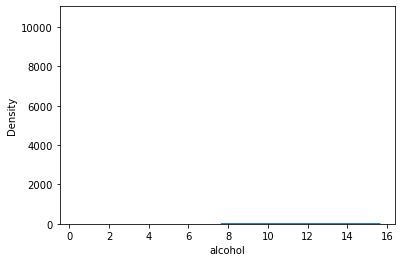

In [30]:
#alcohol 0.860829
print("Graph before removing skewness", sns.distplot(wine_new['alcohol']))

wine_new['alcohol'] = stats.boxcox(wine_new['alcohol'])[0]
    
print("value after removing the skewness", wine_new['alcohol'].skew())
print("New graph after removing the skewness:-")
sns.distplot(wine_new['alcohol'])

In [31]:
wine.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [32]:
print("New Values", wine_new.skew())

New Values fixed acidity           0.393915
citric acid             0.318337
residual sugar          1.806864
chlorides              -0.499643
free sulfur dioxide    -0.019778
total sulfur dioxide   -0.008028
density                 0.071288
pH                      0.193683
sulphates              -0.024779
alcohol                 0.109367
quality                 0.217802
dtype: float64


Now as we have successfully removed the skewness from our dataset we will proceed further.

fixed acidity               AxesSubplot(0.125,0.71587;0.0945122x0.16413)
citric acid              AxesSubplot(0.238415,0.71587;0.0945122x0.16413)
residual sugar           AxesSubplot(0.351829,0.71587;0.0945122x0.16413)
chlorides                AxesSubplot(0.465244,0.71587;0.0945122x0.16413)
free sulfur dioxide      AxesSubplot(0.578659,0.71587;0.0945122x0.16413)
total sulfur dioxide     AxesSubplot(0.692073,0.71587;0.0945122x0.16413)
density                  AxesSubplot(0.805488,0.71587;0.0945122x0.16413)
pH                         AxesSubplot(0.125,0.518913;0.0945122x0.16413)
sulphates               AxesSubplot(0.238415,0.518913;0.0945122x0.16413)
alcohol                 AxesSubplot(0.351829,0.518913;0.0945122x0.16413)
quality                 AxesSubplot(0.465244,0.518913;0.0945122x0.16413)
dtype: object

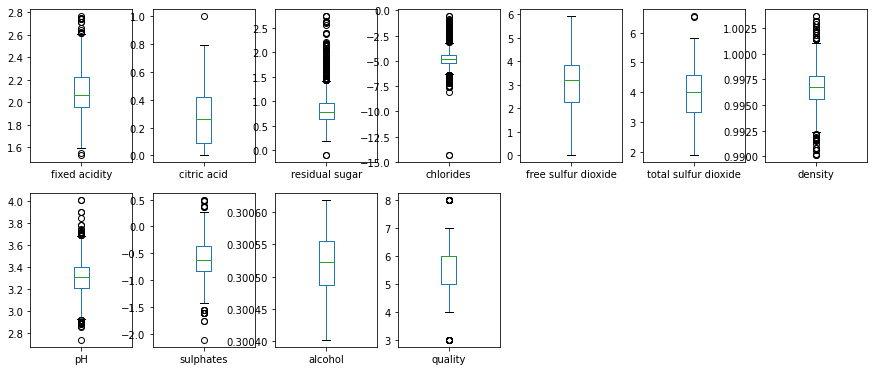

In [33]:
wine_new.plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

From the above graphical representation of our dataset we can check that we have several outliers present in the data set:

1. Fixed acidity have outliers
2. residual sugar
3. Chlorides
4. density
5. Ph
6. Sulphates


Will proceed further to remove the outiers. We can use:-
    
    1. Z-score
    2. IQR
    
 We will try the z-score first

In [34]:
cols = wine_new.columns
cols

Index(['fixed acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [35]:
wine_new.describe()

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,2.098226,0.270976,0.850232,-4.763474,3.129049,3.965719,0.996747,3.311113,-0.609663,0.300524,5.636023
std,0.199412,0.194801,0.357443,0.962770,0.985817,0.846175,0.001887,0.154386,0.340693,0.000039,0.807569
min,1.526056,0.000000,-0.105361,-14.348451,0.000000,1.875723,0.990070,2.740000,-2.114887,0.300402,3.000000
25%,1.960095,0.090000,0.641854,-5.192858,2.248371,3.346596,0.995600,3.210000,-0.835081,0.300488,5.000000
50%,2.066863,0.260000,0.788457,-4.795645,3.215430,3.994882,0.996750,3.310000,-0.622818,0.300523,6.000000
75%,2.219203,0.420000,0.955511,-4.391441,3.827881,4.591023,0.997835,3.400000,-0.373689,0.300556,6.000000
max,2.766319,1.000000,2.740840,-0.552596,5.926269,6.564923,1.003690,4.010000,0.490605,0.300618,8.000000


25 quartile of is: 1.9600947840472698
75 quartile of is: 2.2192034840549946
The IQR value is: 0.2591087000077248
The high value is 2.6078665340665816
The low value is 1.5714317340356825


fixed acidity    AxesSubplot(0.125,0.71587;0.0945122x0.16413)
dtype: object

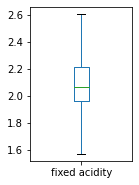

In [36]:
#Fixed acidity have outliers
q1 = wine_new['fixed acidity'].quantile(.25)
q3 = wine_new['fixed acidity'].quantile(.75)
print("25 quartile of is:",q1)
print("75 quartile of is:",q3)

iqr = q3 - q1
print("The IQR value is:",iqr)

high_range = q3 + (1.5*iqr)  
low_range = q1 - (1.5*iqr)
print("The high value is",high_range)
print("The low value is",low_range)

#outliers = [x for x in wine_new if x < lower_range or x > upper_range]
#low_value = wine_new['fixed acidity'] < low_range
#print("low values in Fixed acidity is:", low_value)
#high_value = wine_new['fixed acidity'] > high_range
#print("low values in Fixed acidity is:", high_value)

#(wine_new[wine_new['fixed acidity'] > high_range]) 
#(wine_new[wine_new['fixed acidity'] < low_range])

wine_new['fixed acidity'] = np.where(
    wine_new['fixed acidity'] > high_range,
    high_range,
    np.where(
        wine_new['fixed acidity'] < low_range,
        low_range,
        wine_new['fixed acidity']
    )
)

wine_new['fixed acidity'].plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))


#outliers_removed = [x for x in data if x > lower_range and x < upper_range]
#(wine_new['fixed acidity'] < low_range) | (wine_new['fixed acidity']>high_range)
#wine_new['fixed acidity'].plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))
#wine_new['fixed acidity']
#[[| (wine_new['fixed acidity']>high_range)]

25 quartile of is: 0.6418538861723947
75 quartile of is: 0.9555114450274363
The IQR value is: 0.31365755885504165
The high value is 1.4259977833099988
The low value is 0.17136754788983222


residual sugar    AxesSubplot(0.125,0.71587;0.0945122x0.16413)
dtype: object

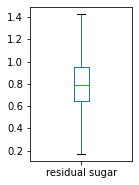

In [37]:
#residual sugar
q1 = wine_new['residual sugar'].quantile(.25)
q3 = wine_new['residual sugar'].quantile(.75)
print("25 quartile of is:",q1)
print("75 quartile of is:",q3)

iqr = q3 - q1
print("The IQR value is:",iqr)

high_range = q3 + (1.5*iqr)  
low_range = q1 - (1.5*iqr)
print("The high value is",high_range)
print("The low value is",low_range)

(wine_new[wine_new['residual sugar'] > high_range]) 
(wine_new[wine_new['residual sugar'] < low_range])

wine_new['residual sugar'] = np.where(
    wine_new['residual sugar'] > high_range,
    high_range,
    np.where(
        wine_new['residual sugar'] < low_range,
        low_range,
        wine_new['residual sugar']
    )
)

wine_new['residual sugar'].plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))



25 quartile of is: -5.192857928055955
75 quartile of is: -4.391441357511707
The IQR value is: 0.801416570544248
The high value is -3.189316501695335
The low value is -6.394982783872327


chlorides    AxesSubplot(0.125,0.71587;0.0945122x0.16413)
dtype: object

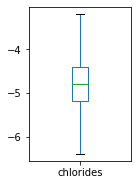

In [38]:
#Chlorides
q1 = wine_new['chlorides'].quantile(.25)
q3 = wine_new['chlorides'].quantile(.75)
print("25 quartile of is:",q1)
print("75 quartile of is:",q3)
iqr = q3 - q1
print("The IQR value is:",iqr)

high_range = q3 + (1.5*iqr)  
low_range = q1 - (1.5*iqr)
print("The high value is",high_range)
print("The low value is",low_range)


(wine_new[wine_new['chlorides'] > high_range]) 
(wine_new[wine_new['chlorides'] < low_range])

wine_new['chlorides'] = np.where(
    wine_new['chlorides'] > high_range,
    high_range,
    np.where(
        wine_new['chlorides'] < low_range,
        low_range,
        wine_new['chlorides']
    )
)

wine_new['chlorides'].plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

25 quartile of is: 0.9956
75 quartile of is: 0.997835
The IQR value is: 0.002234999999999987
The high value is 1.0011875
The low value is 0.9922475000000001


density    AxesSubplot(0.125,0.71587;0.0945122x0.16413)
dtype: object

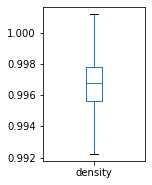

In [39]:
#density
q1 = wine_new['density'].quantile(.25)
q3 = wine_new['density'].quantile(.75)
print("25 quartile of is:",q1)
print("75 quartile of is:",q3)

iqr = q3 - q1
print("The IQR value is:",iqr)

high_range = q3 + (1.5*iqr)  
low_range = q1 - (1.5*iqr)
print("The high value is",high_range)
print("The low value is",low_range)

(wine_new[wine_new['density'] > high_range]) 
(wine_new[wine_new['density'] < low_range])

wine_new['density'] = np.where(
    wine_new['density'] > high_range,
    high_range,
    np.where(
        wine_new['density'] < low_range,
        low_range,
        wine_new['density']
    )
)

wine_new['density'].plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

25 quartile of is: 3.21
75 quartile of is: 3.4
The IQR value is: 0.18999999999999995
The high value is 3.6849999999999996
The low value is 2.925


pH    AxesSubplot(0.125,0.71587;0.0945122x0.16413)
dtype: object

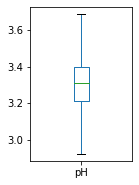

In [40]:
#Ph
q1 = wine_new['pH'].quantile(.25)
q3 = wine_new['pH'].quantile(.75)
print("25 quartile of is:",q1)
print("75 quartile of is:",q3)

iqr = q3 - q1
print("The IQR value is:",iqr)

high_range = q3 + (1.5*iqr)  
low_range = q1 - (1.5*iqr)
print("The high value is",high_range)
print("The low value is",low_range)


(wine_new[wine_new['pH'] > high_range]) 
(wine_new[wine_new['pH'] < low_range])

wine_new['pH'] = np.where(
    wine_new['pH'] > high_range,
    high_range,
    np.where(
        wine_new['pH'] < low_range,
        low_range,
        wine_new['pH']
    )
)

wine_new['pH'].plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

25 quartile of is: -0.8350811532867486
75 quartile of is: -0.37368948241105976
The IQR value is: 0.46139167087568883
The high value is 0.31839802390247346
The low value is -1.5271686596002818


sulphates    AxesSubplot(0.125,0.71587;0.0945122x0.16413)
dtype: object

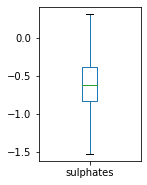

In [41]:
#sulphates
q1 = wine_new['sulphates'].quantile(.25)
q3 = wine_new['sulphates'].quantile(.75)
print("25 quartile of is:",q1)
print("75 quartile of is:",q3)

iqr = q3 - q1
print("The IQR value is:",iqr)

high_range = q3 + (1.5*iqr)  
low_range = q1 - (1.5*iqr)
print("The high value is",high_range)
print("The low value is",low_range)

(wine_new[wine_new['sulphates'] > high_range]) 
(wine_new[wine_new['sulphates'] < low_range])

wine_new['sulphates'] = np.where(
    wine_new['sulphates'] > high_range,
    high_range,
    np.where(
        wine_new['sulphates'] < low_range,
        low_range,
        wine_new['sulphates']
    )
)

wine_new['sulphates'].plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

fixed acidity               AxesSubplot(0.125,0.71587;0.0945122x0.16413)
citric acid              AxesSubplot(0.238415,0.71587;0.0945122x0.16413)
residual sugar           AxesSubplot(0.351829,0.71587;0.0945122x0.16413)
chlorides                AxesSubplot(0.465244,0.71587;0.0945122x0.16413)
free sulfur dioxide      AxesSubplot(0.578659,0.71587;0.0945122x0.16413)
total sulfur dioxide     AxesSubplot(0.692073,0.71587;0.0945122x0.16413)
density                  AxesSubplot(0.805488,0.71587;0.0945122x0.16413)
pH                         AxesSubplot(0.125,0.518913;0.0945122x0.16413)
sulphates               AxesSubplot(0.238415,0.518913;0.0945122x0.16413)
alcohol                 AxesSubplot(0.351829,0.518913;0.0945122x0.16413)
quality                 AxesSubplot(0.465244,0.518913;0.0945122x0.16413)
dtype: object

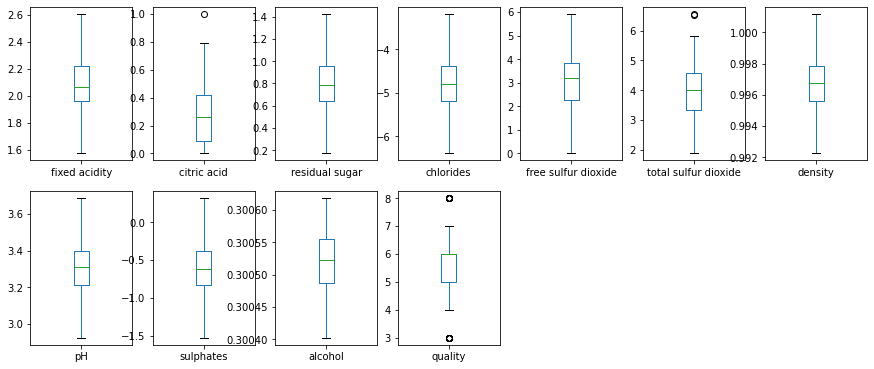

In [42]:
wine_new.plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

In [43]:
wine_new.skew()

fixed acidity           0.338284
citric acid             0.318337
residual sugar          0.622058
chlorides               0.006845
free sulfur dioxide    -0.019778
total sulfur dioxide   -0.008028
density                 0.025021
pH                      0.054017
sulphates               0.025139
alcohol                 0.109367
quality                 0.217802
dtype: float64

In [44]:
wine_new

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.001480,0.00,0.641854,-4.920401,2.867882,3.861490,0.99780,3.51,-0.801405,0.300482,5
1,2.054124,0.00,0.955511,-4.140122,4.102521,4.686835,0.99680,3.20,-0.476630,0.300504,5
2,2.054124,0.04,0.832909,-4.325636,3.317116,4.421290,0.99700,3.26,-0.546246,0.300504,5
3,2.415914,0.56,0.641854,-4.963593,3.504207,4.550629,0.99800,3.16,-0.737642,0.300504,6
4,2.001480,0.00,0.641854,-4.920401,2.867882,3.861490,0.99780,3.51,-0.801405,0.300482,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,1.824549,0.08,0.693147,-4.391441,4.503448,4.171856,0.99490,3.45,-0.737642,0.300535,5
1595,1.774952,0.10,0.788457,-5.614127,4.835265,4.351412,0.99512,3.52,-0.318618,0.300559,6
1596,1.840550,0.13,0.832909,-4.920401,4.341848,4.056652,0.99574,3.42,-0.336470,0.300553,6
1597,1.774952,0.12,0.693147,-4.963593,4.503448,4.171856,0.99547,3.57,-0.413072,0.300523,5


In [45]:
x = wine_new.iloc[:,0:10]
x

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2.001480,0.00,0.641854,-4.920401,2.867882,3.861490,0.99780,3.51,-0.801405,0.300482
1,2.054124,0.00,0.955511,-4.140122,4.102521,4.686835,0.99680,3.20,-0.476630,0.300504
2,2.054124,0.04,0.832909,-4.325636,3.317116,4.421290,0.99700,3.26,-0.546246,0.300504
3,2.415914,0.56,0.641854,-4.963593,3.504207,4.550629,0.99800,3.16,-0.737642,0.300504
4,2.001480,0.00,0.641854,-4.920401,2.867882,3.861490,0.99780,3.51,-0.801405,0.300482
...,...,...,...,...,...,...,...,...,...,...
1594,1.824549,0.08,0.693147,-4.391441,4.503448,4.171856,0.99490,3.45,-0.737642,0.300535
1595,1.774952,0.10,0.788457,-5.614127,4.835265,4.351412,0.99512,3.52,-0.318618,0.300559
1596,1.840550,0.13,0.832909,-4.920401,4.341848,4.056652,0.99574,3.42,-0.336470,0.300553
1597,1.774952,0.12,0.693147,-4.963593,4.503448,4.171856,0.99547,3.57,-0.413072,0.300523


In [46]:
y = pd.DataFrame(wine['quality'])
y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [47]:
y['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [48]:
y.loc[0] = 5
y.loc[0]

quality    5
Name: 0, dtype: int64

In [49]:
len(y)

1599

In [50]:
y.loc[(y['quality'] < 7.0),'quality'] = 0.0

In [51]:
y.loc[(y['quality'] >= 7.0),'quality']=1

In [52]:
y['quality']

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [53]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

#y = scaler.fit_transform(y)

In [54]:
y

,quality
0,0
1,0
2,0
3,0
4,0
...,...
1594,0
1595,0
1596,0
1597,0


In [55]:
print(y.shape)
print(x.shape)

(1599, 1)
(1599, 10)


In [56]:
print(y.shape)
print(x.shape)

(1599, 1)
(1599, 10)


In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x , y ,test_size =.30,random_state = 45)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [60]:
lr = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()

In [61]:
print(lr.fit(x_train,y_train))
print(gnb.fit(x_train,y_train))
print(svc.fit(x_train,y_train))
print(knn.fit(x_train,y_train))
print(dtc.fit(x_train,y_train))

LogisticRegression()
GaussianNB()
SVC()
KNeighborsClassifier()
DecisionTreeClassifier()


In [62]:
pred_lr = lr.predict(x_test)
pred_gnb = gnb.predict(x_test)
pred_svc = svc.predict(x_test)
pred_knn = knn.predict(x_test)
pred_dtc = dtc.predict(x_test)

In [63]:
print("Printing the Accuracy Score, Confusion Matrix and Classification Report for our model:- ")

print("Details for Linear Regression Model :-")
print(accuracy_score(y_test,pred_lr),'\n')
print(confusion_matrix(y_test,pred_lr),'\n')
print(classification_report(y_test,pred_lr),'\n')

print("Details for Naive Bayes Model :-")
print(accuracy_score(y_test,pred_gnb),'\n')
print(confusion_matrix(y_test,pred_gnb),'\n')
print(classification_report(y_test,pred_gnb),'\n')

print("Details for Support Vector Model :-")
print(accuracy_score(y_test,pred_svc),'\n')
print(confusion_matrix(y_test,pred_svc),'\n')
print(classification_report(y_test,pred_svc),'\n')

print("Details for KNN Model :-")
print(accuracy_score(y_test,pred_knn),'\n')
print(confusion_matrix(y_test,pred_knn),'\n')
print(classification_report(y_test,pred_knn),'\n')

print("Details for Decision Tree :-")
print(accuracy_score(y_test,pred_dtc),'\n')
print(confusion_matrix(y_test,pred_dtc),'\n')
print(classification_report(y_test,pred_dtc),'\n')

Printing the Accuracy Score, Confusion Matrix and Classification Report for our model:- 
Details for Linear Regression Model :-
0.8854166666666666 

[[412  14]
 [ 41  13]] 

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       426
           1       0.48      0.24      0.32        54

    accuracy                           0.89       480
   macro avg       0.70      0.60      0.63       480
weighted avg       0.86      0.89      0.87       480
 

Details for Naive Bayes Model :-
0.8854166666666666 

[[393  33]
 [ 22  32]] 

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       426
           1       0.49      0.59      0.54        54

    accuracy                           0.89       480
   macro avg       0.72      0.76      0.74       480
weighted avg       0.90      0.89      0.89       480
 

Details for Support Vector Model :-
0.8875 

[[426   0]
 [ 54   0]] 

              preci

In [64]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(gnb,x,y,cv=5)
print('\n')
print(score)
print(score.mean())
print(score.std())
print('------------------------')
score=cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('------------------------')
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('------------------------')
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('------------------------')
score=cross_val_score(lr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())



[0.88125    0.74375    0.871875   0.815625   0.86833856]
0.8361677115987461
0.05158570140496702
------------------------
[0.865625   0.865625   0.8625     0.8625     0.86520376]
0.8642907523510971
0.0014702113940265387
------------------------
[0.865625   0.778125   0.84375    0.81875    0.86833856]
0.8349177115987461
0.03354014562340606
------------------------
[0.88125    0.7875     0.840625   0.75       0.84952978]
0.8217809561128526
0.04688145057865425
------------------------
[0.86875    0.840625   0.86875    0.85625    0.86833856]
0.8605427115987461
0.011051126594313723


From the above details we can check that KNN model has least difference hence it is best model. no, will try hyper parameter tuning on KNN. Also, applied on others for practice. 

We have tried using KNN by changing several parameters, but to check exact parameter will for Grid search. 

In [90]:
knn = KNeighborsClassifier(n_neighbors = 10,weights='distance', algorithm='ball_tree', leaf_size=40, p=2, metric='minkowski', n_jobs=-1)
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
print("Details for KNN Model :-")
print(accuracy_score(y_test,pred_knn),'\n')
print(confusion_matrix(y_test,pred_knn),'\n')
print(classification_report(y_test,pred_knn),'\n')

Details for KNN Model :-
0.9020833333333333 

[[413  13]
 [ 34  20]] 

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       426
           1       0.61      0.37      0.46        54

    accuracy                           0.90       480
   macro avg       0.76      0.67      0.70       480
weighted avg       0.89      0.90      0.89       480
 



In [66]:
#using Decision Tree with different values

In [67]:
dtc = DecisionTreeClassifier(criterion='entropy', splitter='best',max_depth=10,max_features='sqrt') #“auto”, “sqrt”, “log2”

In [68]:
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)
print("Details for Decision Tree :-")
print(accuracy_score(y_test,pred_dtc),'\n')
print(confusion_matrix(y_test,pred_dtc),'\n')
print(classification_report(y_test,pred_dtc),'\n')

Details for Decision Tree :-
0.8520833333333333 

[[383  43]
 [ 28  26]] 

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       426
           1       0.38      0.48      0.42        54

    accuracy                           0.85       480
   macro avg       0.65      0.69      0.67       480
weighted avg       0.87      0.85      0.86       480
 



In [69]:
lr = LogisticRegression() #,penalty='l2',solver='newton-cg',l1_ratio = 1 ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’, 'newton-cg
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
print("Details for Linear Regression Model :-")
print(accuracy_score(y_test,pred_lr),'\n')
print(confusion_matrix(y_test,pred_lr),'\n')
print(classification_report(y_test,pred_lr),'\n')

Details for Linear Regression Model :-
0.8854166666666666 

[[412  14]
 [ 41  13]] 

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       426
           1       0.48      0.24      0.32        54

    accuracy                           0.89       480
   macro avg       0.70      0.60      0.63       480
weighted avg       0.86      0.89      0.87       480
 



Hyper Parameter Tuning

class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

In [70]:
#n_neighbors = 10,weights='distance', algorithm='ball_tree', 
#leaf_size=40, p=2, metric='minkowski', metric_params=None, n_jobs=-1

from sklearn.model_selection import GridSearchCV

parameter = [{'n_neighbors':[5,10,15,20] , 'weights' : ['uniform'], 'algorithm' : ['auto']},
            {'n_neighbors':[10,20,30,40] , 'weights' : ['distance'], 'algorithm' : ['ball_tree'], 'leaf_size':[40]},
            {'n_neighbors':[2,4,6,8,10] , 'weights' : ['uniform'], 'algorithm' : ['kd_tree']},
            {'n_neighbors':[10,20,30,40],'weights':['distance'],'algorithm':['ball_tree'],'leaf_size':[40],'p':[2],'metric':['minkowski'],'n_jobs':[-1]}]

grid_search = GridSearchCV ( estimator = knn,
                            param_grid = parameter,
                            scoring = 'accuracy',
                            cv = 10,
                            n_jobs = -1)
grid_search = grid_search.fit(x_train,y_train)

In [71]:
accuracy = grid_search.best_score_
accuracy

0.8829391891891893

In [72]:
grid_search.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 40,
 'n_neighbors': 30,
 'weights': 'distance'}

class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

In [73]:
from sklearn.model_selection import GridSearchCV

parameter = [{'C':[1,10,100,1000] , 'kernel' : ['linear']},
            {'C':[1,10,100,1000] , 'kernel' : ['rbf'] , 'gamma' : [11,12,13,14,15,16,17,18,19,20]}]

grid_search = GridSearchCV ( estimator = svc,
                            param_grid = parameter,
                            scoring = 'accuracy',
                            cv = 10,
                            n_jobs = -1)
grid_search = grid_search.fit(x_train,y_train)

In [74]:
accuracy = grid_search.best_score_
accuracy

0.8927606177606175

In [75]:
grid_search.best_params_

{'C': 10, 'gamma': 16, 'kernel': 'rbf'}

In [76]:
svc2 = SVC(kernel = 'rbf', gamma = 16 , C = 10,probability=True)
print(svc2.fit(x_train,y_train))
pred_svc2 = svc2.predict(x_test)
print(accuracy_score(y_test,pred_svc2),'\n')
print(confusion_matrix(y_test,pred_svc2),'\n')
print(classification_report(y_test,pred_svc2),'\n')

SVC(C=10, gamma=16, probability=True)
0.91875 

[[423   3]
 [ 36  18]] 

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       426
           1       0.86      0.33      0.48        54

    accuracy                           0.92       480
   macro avg       0.89      0.66      0.72       480
weighted avg       0.91      0.92      0.90       480
 



class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

In [77]:
#Grid search for linear regression
parameter = [{'penalty':['l2'] , 'C' : [1,10,100,1000],'solver':['liblinear']},
            {'penalty':['l1'] , 'C' : [1,10,100,1000],'solver':['liblinear']}]

grid_search = GridSearchCV ( estimator = lr,
                            param_grid = parameter,
                            scoring = 'accuracy',
                            cv = 20,
                            n_jobs = -1)
grid_search = grid_search.fit(x_train,y_train)

In [78]:
accuracy = grid_search.best_score_
accuracy

0.854366883116883

In [79]:
grid_search.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

In [80]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [81]:
y_predict_prob = lr.predict_proba(x_test)[:,1]

In [82]:
fpr,tpr,threshold = roc_curve(y_test,y_predict_prob)

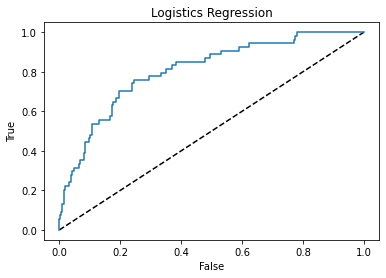

In [83]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistics Regression')
plt.xlabel('False')
plt.ylabel('True')
plt.title('Logistics Regression')
plt.show()

In [84]:
#lr = LogisticRegression()
#gnb = GaussianNB()
#svc = SVC()
#knn = KNeighborsClassifier()
#dtc = DecisionTreeClassifier()

In [85]:
y_predict_prob = gnb.predict_proba(x_test)[:,1]

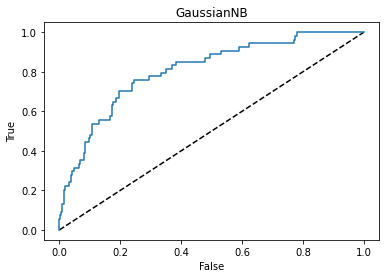

In [86]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GaussianNB')
plt.xlabel('False')
plt.ylabel('True')
plt.title('GaussianNB')
plt.show()

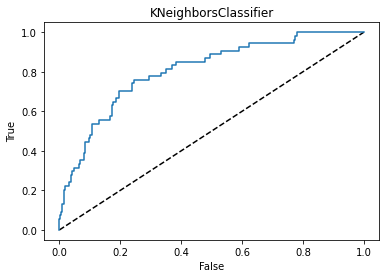

In [87]:
y_predict_prob = knn.predict_proba(x_test)[:,1]
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False')
plt.ylabel('True')
plt.title('KNeighborsClassifier')
plt.show()

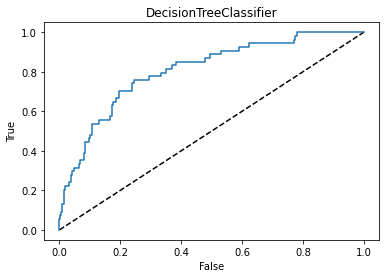

In [88]:
y_predict_prob = dtc.predict_proba(x_test)[:,1]
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='DecisionTreeClassifier')
plt.xlabel('False')
plt.ylabel('True')
plt.title('DecisionTreeClassifier')
plt.show()

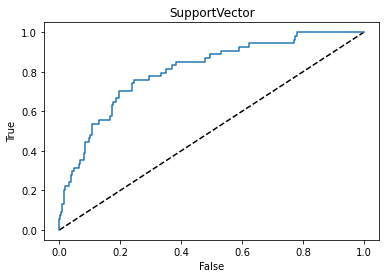

In [89]:
y_predict_prob = svc2.predict_proba(x_test)[:,1]
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='SupportVector')
plt.xlabel('False')
plt.ylabel('True')
plt.title('SupportVector')
plt.show()

saving the model:-

In [91]:
import pickle

In [95]:
filename = 'wine_final_model.pkl'

In [96]:
pickle.dump(knn, open(filename, 'wb'))